In [4]:
# 의사결정나무
# parameter(매개변수 튜닝 중요) : leaf node, Depth 조절 중요 > 과대적합 방지
# 분류, 회귀
# 범주형 목표변수일 경우, 불순도 사용
# > 지니지수 : 소수점을 제곱하면 작아진다. 그러나 소수점인데 큰 값이 작은 값보다 제곱해도 더 크다.
# >> 지니지수는 1에서 소수점 제곱의 합을 빼준다. 소수점 제곱의 합이 클 수록 지니지수는 작아진다.
# >> 지니지수가 작을 수록 순수도가 높다.
# > 엔트로피지수 : 엔트로피지수가 낮을 수록 순수도가 높다.
# 불순도를 낮추는 방향으로 분리

In [6]:
# 가지치기 : 과적합 방지

In [9]:
# credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 의사 결정 나무 모델을 만들어라.
import pandas as pd
import numpy as np

credit = pd.read_csv('data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [10]:
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']
# 전처리 안해도, 시험장에서는 꼭 해라. (결측치 제거 필요)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 1)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# 기본값으로 모델 생성 
dt_clf = DecisionTreeClassifier()
dt_clf
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 학습용 데이터에 대한 정확도 > 100% 기본값을 모두 분류
dt_clf.score(X_train, y_train)

1.0

In [17]:
# 테스트 데이터 대한 정확도 > 71% > 과적합
dt_clf.score(X_test, y_test)

0.7166666666666667

In [18]:
## 예측 
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, precision_score, f1_score, recall_score

confusion_matrix(y_test,dt_prediction)

array([[ 49,  42],
       [ 43, 166]])

In [20]:
print(precision_score(y_test,dt_prediction))
print(recall_score(y_test,dt_prediction))
print(f1_score(y_test,dt_prediction))
# 아래 결과로만 봤을 때 잘 맞춘걸로 보이나 실상은 1일때만 잘 맞추고 있음.

0.7980769230769231
0.7942583732057417
0.7961630695443646


In [21]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       0.53      0.54      0.54        91
           1       0.80      0.79      0.80       209

    accuracy                           0.72       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.72      0.72      0.72       300



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


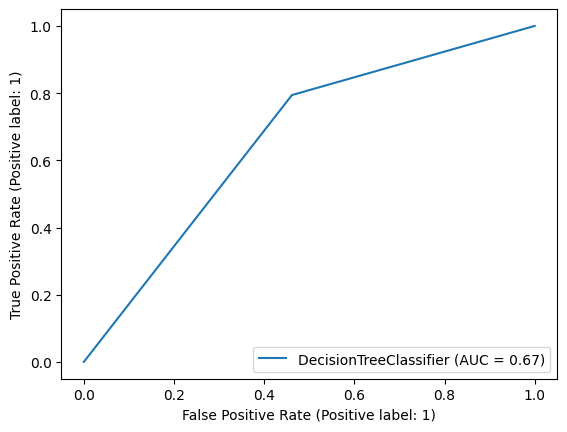

In [22]:
plot_roc_curve(dt_clf, X_test,y_test)

In [23]:
## ROC_AUC_SCORE
roc_auc_score(y_test,dt_clf.predict_proba(X_test)[:,1])

0.66635995583364

In [26]:
# 기본이 0.5 인데 0.66이면 성능이 좋지 못하다.
# 논문에는 0.9 Good, 0.7~0.8 pair, 0.7 미만은 좋지 못한 성능

In [27]:
dt_clf.get_depth()

16

In [29]:
# 가지치기 : 주요 매개변수 조정

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(2,16,1) , 'min_samples_leaf':range(1,20,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
model_grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 20)})

In [31]:
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=13, min_samples_leaf=8)

In [32]:
model_grid_tree.best_score_

0.7471428571428571

In [33]:
model_grid_tree.score(X_test, y_test)

0.7033333333333334

In [34]:
y_pred = model_grid_tree.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[ 49,  42],
       [ 47, 162]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


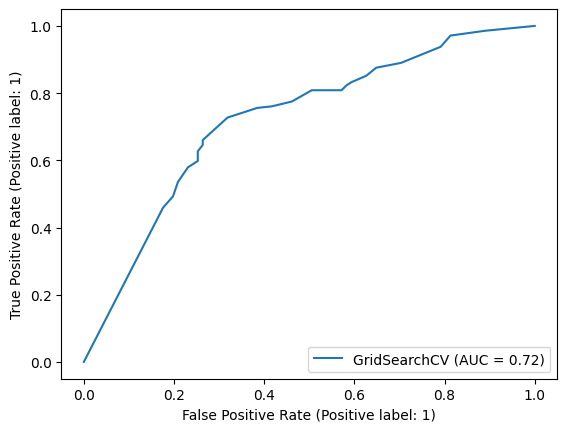

In [36]:
plot_roc_curve(model_grid_tree, X_test,y_test)

In [37]:
roc_auc_score(y_test,model_grid_tree.predict_proba(X_test)[:,1])

0.7215679057784321

In [40]:
# 결과 해석
# 과적합을 막고, 최적의 분류 모델을 찾기 위해 GridSearchCV를 사용하였다.
# max_depth = 13, min_samples_leaf = 8로 모델을 학습시켰다.
# 결과 ROC_AUC_SCORE는 0.72로 준수하다고 볼 수 는 없다.
# 다른 모델을 통해 정확도를 향상시킬 방안을 찾아봐야 함.

In [41]:
# 설명력을 요하는 산업을 제외한 나머지(ADP 포함)에서 의사결정나무만 단독으로 사용하는 경우는 거의 없다.

In [43]:
# CCP alpha

In [44]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.0008658 , 0.00090226, 0.00093212, 0.00130952,
        0.00130952, 0.00130952, 0.00130952, 0.00131868, 0.00132653,
        0.00132689, 0.00137845, 0.00137931, 0.00167029, 0.0016855 ,
        0.00178571, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
        0.00205782, 0.00214286, 0.00214769, 0.00221612, 0.00222222,
        0.00223253, 0.00228571, 0.00228571, 0.00233333, 0.00238095,
        0.00238095, 0.00238095, 0.00244898, 0.0025    , 0.00255147,
        0.00257143, 0.00257143, 0.00257937, 0.0026762 , 0.0027381 ,
        0.00290249, 0.00297058, 0.00308673, 0.00314286, 0.00322024,
        0.00342857, 0.00344708, 0.00344898, 0.0034598 , 0.00347949,
        0.00425298, 0.00433766, 0.00449838, 0.0052565 , 0.00601837,
        0.00639758, 0.0069204 , 0.00720377, 0.00767962, 0.01133542,
        0.01345473, 0.05581984]),
 'impurities': array([0.        , 0.0025974 , 0.00530417, 0.00810052, 0.01071957,
        0.01333862, 0.01595766, 0.01857671, 0.02385144

In [45]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

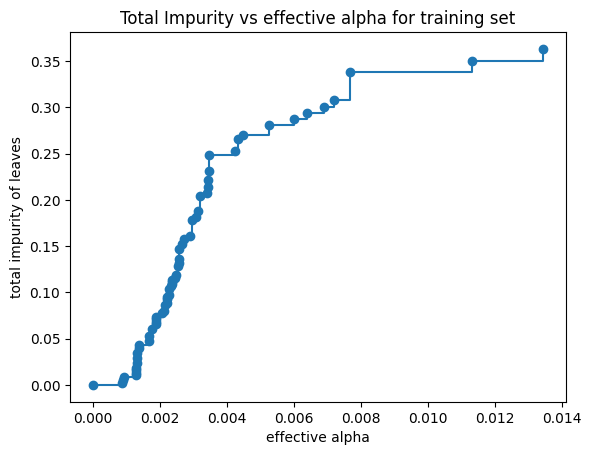

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [48]:
# total impurity of leaves (불순도 개념) 값이 높아지는 지점에서 ccp_alpha 적용
dt_clf_pr = DecisionTreeClassifier(ccp_alpha=0.0055)
dt_clf_pr = dt_clf_pr.fit(X_train, y_train)
dt_prediction_pr = dt_clf_pr.predict(X_test)

In [49]:
confusion_matrix(y_test, dt_prediction_pr)

array([[ 40,  51],
       [ 31, 178]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


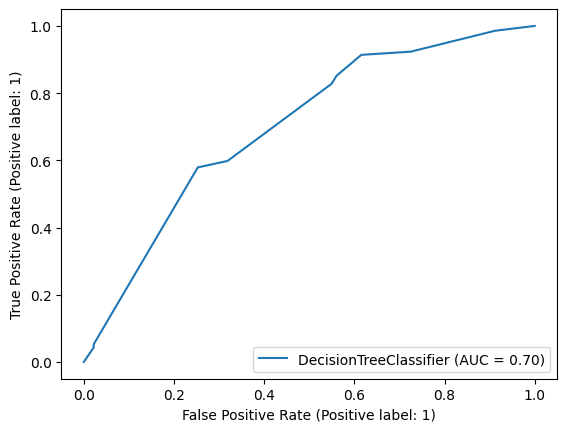

In [50]:
plot_roc_curve(dt_clf_pr,X_test,y_test)

In [51]:
roc_auc_score(y_test,dt_clf_pr.predict_proba(X_test)[:,1])

0.7009569377990431

In [ ]:
# ccp_alpha를 해도, 성능은 비슷하다.